In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Optional for better plot display
sns.set(style='whitegrid')

In [35]:
df = pd.read_csv('/content/first inten project (2).csv')

In [37]:
df.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [38]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [39]:
df.head()

booking_id  number_of_adults  number_of_children  number_of_weekend_nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead_time market_segment_type  repeated  p-c  p-not-c  average_price  \
0        224             Offline         0    0        0          88.00   
1          5              Online         0    0        0         106.68   
2          1              Online         0    0        0          50.00   
3        211              Online         0    0        0         100.00   
4         48              Online         0    0        0          77.00   

   special_requests date_of_reservation booking_status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  p-c                       36285 non-null  int64  
 12  p-not-c                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

In [41]:
# Step 1: Encode 'booking status' to 0 and 1
df['cancelled'] = df['booking_status'].apply(lambda x: 1 if x.lower() == 'canceled' else 0)

# Step 2: Encode categorical features
df['room_type'] = df['room_type'].astype('category').cat.codes
df['type_of_meal'] = df['type_of_meal'].astype('category').cat.codes
df['market_segment_type'] = df['market_segment_type'].astype('category').cat.codes


In [42]:
df.head()

booking_id  number_of_adults  number_of_children  number_of_weekend_nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space  room_type  \
0                      5             0                  0          0   
1                      3             3                  0          0   
2                      3             0                  0          0   
3                      2             0                  0          0   
4                      2             3                  0          0   

   lead_time  market_segment_type  repeated  p-c  p-not-c  average_price  \
0        224                    3         0    0        0          88.00   
1          5                    4         0    0        0         106.68   
2          1                    4         0    0        0          50.00   
3        211                    4         0    0        0         100.00   
4         48                    4         0    0        0          77.00   

   special_requests date_of_reservation booking_status  cancelled  
0                 0           10/2/2015   Not_Canceled          0  
1                 1           11/6/2018   Not_Canceled          0  
2                 0           2/28/2018       Canceled          1  
3                 1           5/20/2017       Canceled          1  
4                 0           4/11/2018       Canceled          1

In [43]:
df.drop('booking_status', axis=1, inplace=True)


In [44]:
df.drop('booking_id', axis=1, inplace=True)

In [45]:
df.drop('date_of_reservation', axis=1, inplace=True)

In [46]:
df.head()

number_of_adults  number_of_children  number_of_weekend_nights  \
0                 1                   1                         2   
1                 1                   0                         1   
2                 2                   1                         1   
3                 1                   0                         0   
4                 1                   0                         1   

   number_of_week_nights  type_of_meal  car_parking_space  room_type  \
0                      5             0                  0          0   
1                      3             3                  0          0   
2                      3             0                  0          0   
3                      2             0                  0          0   
4                      2             3                  0          0   

   lead_time  market_segment_type  repeated  p-c  p-not-c  average_price  \
0        224                    3         0    0        0          88.00   
1          5                    4         0    0        0         106.68   
2          1                    4         0    0        0          50.00   
3        211                    4         0    0        0         100.00   
4         48                    4         0    0        0          77.00   

   special_requests  cancelled  
0                 0          0  
1                 1          0  
2                 0          1  
3                 1          1  
4                 0          1

/tmp/ipython-input-49-3125727689.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette="coolwarm")


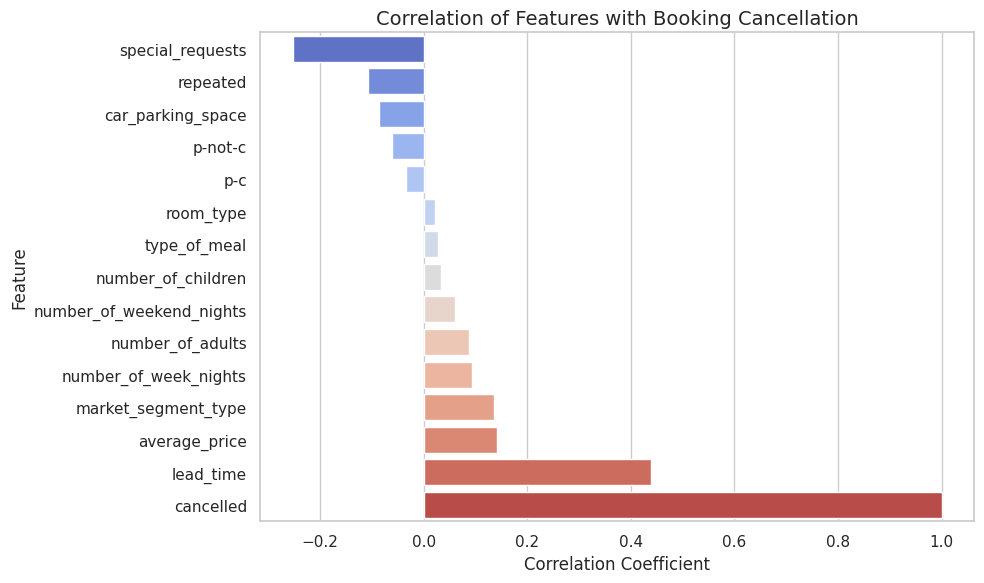

In [49]:

# Compute correlation with 'cancelled'
correlation = df.corr(numeric_only=True)['cancelled'].sort_values(ascending=True)

# Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index, palette="coolwarm")
plt.title("Correlation of Features with Booking Cancellation", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


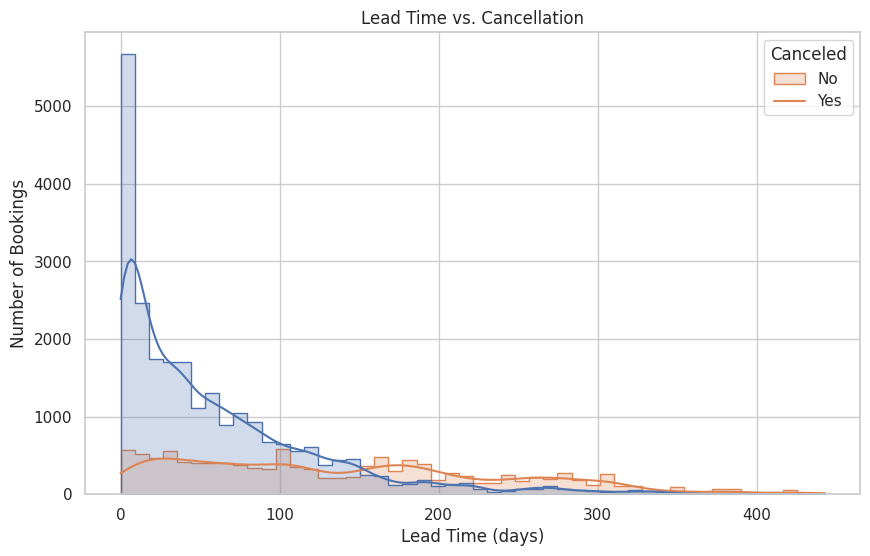

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='cancelled', bins=50, kde=True, element='step')
plt.title("Lead Time vs. Cancellation")
plt.xlabel("Lead Time (days)")
plt.ylabel("Number of Bookings")
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()


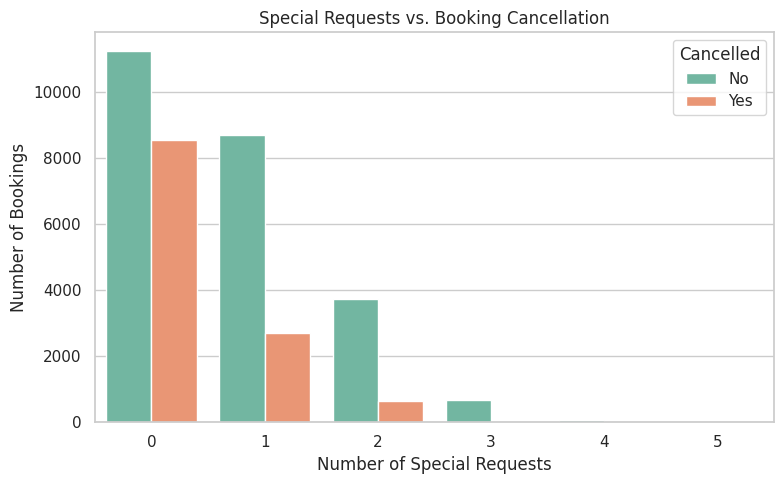

In [54]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='special_requests', hue='cancelled', palette='Set2')

plt.title('Special Requests vs. Booking Cancellation')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.legend(title='Cancelled', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()